In [68]:
%matplotlib inline

import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection  import train_test_split
import numpy as np
from scipy.stats import norm 
from scipy import stats, integrate
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.api as sm
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
from math import log
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.preprocessing import binarize
import statsmodels.formula.api as sm
from dmba import regressionSummary, exhaustive_search
import statsmodels.api as sm
from mord import LogisticIT

In [69]:
df = pd.read_csv('Dataset.csv')

In [70]:
# Calculating frequency distribution of each variable in terms of missing value.
# We will drop the variables which will have value more than 80%, it means more than 80% is missing in variable.
# So, better to remove them
df = df.replace(' ', np.nan, regex=False)

print(df.isna().sum()/len(df)*100)

ACCNUM            0.000000
YEAR              0.000000
MONTH             0.000000
DAY               0.000000
HOUR              0.000000
MINUTE            0.000000
WEEKDAY           0.000000
LATITUDE          0.000000
LONGITUDE         0.000000
WardName         14.279500
WARDNUMBER       14.279500
Neighbourhood     0.000000
Hood_ID           0.000000
DIVISION          0.000000
DISTRICT          0.080780
STREET1           0.000000
STREET2           8.668365
OFFSET           85.161250
ROAD_CLASS        2.286709
LOCCOORD          0.807805
ACCLOC           33.865656
TRAFFCTL          0.180203
VISIBILITY        0.136705
LIGHT             0.000000
RDSFCOND          0.167775
ACCLASS           0.000000
IMPACTYPE         0.024856
INVTYPE           0.062139
INVAGE            0.000000
INJURY            9.998136
FATAL_NO         95.818058
INITDIR          30.050332
VEHTYPE          15.702479
MANOEUVER        43.198906
DRIVACT          50.090101
DRIVCOND         50.090101
PEDTYPE          84.030324
P

In [71]:
#Dropping columns where missing values are greater than 80%
df = df.drop(["PEDTYPE", "PEDACT", "PEDCOND", "CYCLISTYPE", "CYCACT", "CYCCOND", "OFFSET", "FATAL_NO"], axis=1)
# printing the present variables of dataset
df.columns

Index(['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'WardName', 'WARDNUMBER', 'Neighbourhood',
       'Hood_ID', 'DIVISION', 'DISTRICT', 'STREET1', 'STREET2', 'ROAD_CLASS',
       'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'INITDIR',
       'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'FATAL'],
      dtype='object')

In [72]:
#Checking the data types of variables. So, that we can use them appropriately
df.dtypes

ACCNUM             int64
YEAR               int64
MONTH              int64
DAY                int64
HOUR               int64
MINUTE             int64
WEEKDAY            int64
LATITUDE         float64
LONGITUDE        float64
WardName          object
WARDNUMBER       float64
Neighbourhood     object
Hood_ID            int64
DIVISION          object
DISTRICT          object
STREET1           object
STREET2           object
ROAD_CLASS        object
LOCCOORD          object
ACCLOC            object
TRAFFCTL          object
VISIBILITY        object
LIGHT             object
RDSFCOND          object
ACCLASS           object
IMPACTYPE         object
INVTYPE           object
INVAGE            object
INJURY            object
INITDIR           object
VEHTYPE           object
MANOEUVER         object
DRIVACT           object
DRIVCOND          object
PEDESTRIAN         int64
CYCLIST            int64
AUTOMOBILE         int64
MOTORCYCLE         int64
TRUCK              int64
TRSN_CITY_VEH      int64


In [73]:
# Note: Don't run this code again, because the object type has already been changed to category in the first run. It will throw an error, if you just run this cell. Rather, try ruuning the code from start to check it
# We need to change object data type to category. So, that we can leverage them using dummies formation 
cols = df.select_dtypes(["object"]).columns
df[cols] = df[cols].astype('category')

In [74]:
# printing the data types again
df.dtypes

ACCNUM              int64
YEAR                int64
MONTH               int64
DAY                 int64
HOUR                int64
MINUTE              int64
WEEKDAY             int64
LATITUDE          float64
LONGITUDE         float64
WardName         category
WARDNUMBER        float64
Neighbourhood    category
Hood_ID             int64
DIVISION         category
DISTRICT         category
STREET1          category
STREET2          category
ROAD_CLASS       category
LOCCOORD         category
ACCLOC           category
TRAFFCTL         category
VISIBILITY       category
LIGHT            category
RDSFCOND         category
ACCLASS          category
IMPACTYPE        category
INVTYPE          category
INVAGE           category
INJURY           category
INITDIR          category
VEHTYPE          category
MANOEUVER        category
DRIVACT          category
DRIVCOND         category
PEDESTRIAN          int64
CYCLIST             int64
AUTOMOBILE          int64
MOTORCYCLE          int64
TRUCK       

In [75]:
# Preparing data for modeling
# First use common-sense, We could see many varibales which are telling about the location,
# if we have latitude and longitude then we can find anything we want like divison, ward number/name, streets etc.
# create a copy of dataframe for modeling purpose so that we can use original dataframe for visualisation and analysis purpose if need to
df1 = df
df1.columns

Index(['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'WardName', 'WARDNUMBER', 'Neighbourhood',
       'Hood_ID', 'DIVISION', 'DISTRICT', 'STREET1', 'STREET2', 'ROAD_CLASS',
       'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'INITDIR',
       'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'FATAL'],
      dtype='object')

In [76]:
df1 = df1.drop(["WardName", "WARDNUMBER", "Neighbourhood", "DIVISION", "STREET1", "STREET2", "LOCCOORD", "ACCLOC","INITDIR"], axis=1)
df1.columns

Index(['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Hood_ID', 'DISTRICT', 'ROAD_CLASS',
       'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE',
       'INVTYPE', 'INVAGE', 'INJURY', 'VEHTYPE', 'MANOEUVER', 'DRIVACT',
       'DRIVCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE',
       'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING',
       'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'FATAL'],
      dtype='object')

In [77]:
# Dropping few more, ACCLASS has variables fatal and non-fatal, and We also have FATAL variable which has values 0 and 1, which tells us the same story.
# dropping VEHTYPE because we already have different variables like automobile, motorcycle etc.
df1=df1.drop(["ACCLASS","VEHTYPE"],axis=1)
df1.columns

Index(['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Hood_ID', 'DISTRICT', 'ROAD_CLASS',
       'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE',
       'INVAGE', 'INJURY', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDESTRIAN',
       'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY', 'FATAL'],
      dtype='object')

In [78]:
# This Age variable data formatted in a bad way. So, can' t be used.
df1.INVAGE

0        50 to 54
1        15 to 19
2        55 to 59
3        20 to 24
4        15 to 19
           ...   
16088    20 to 24
16089    10 to 14
16090    50 to 54
16091    25 to 29
16092    25 to 29
Name: INVAGE, Length: 16093, dtype: category
Categories (21, object): [0 to 4, 10 to 14, 15 to 19, 20 to 24, ..., 85 to 89, 90 to 94, Over 95, unknown]

In [79]:
df1=df1.drop(["INVAGE"],axis=1)
df1.columns

Index(['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Hood_ID', 'DISTRICT', 'ROAD_CLASS',
       'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE',
       'INJURY', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'FATAL'],
      dtype='object')

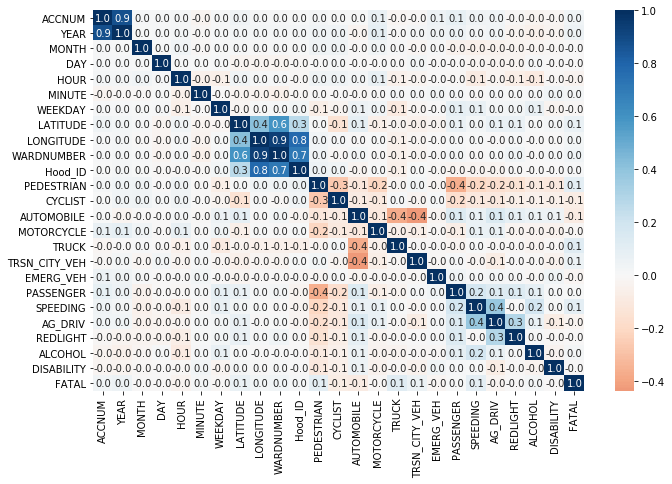

In [80]:
#correlation 
corr = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

No handles with labels found to put in legend.


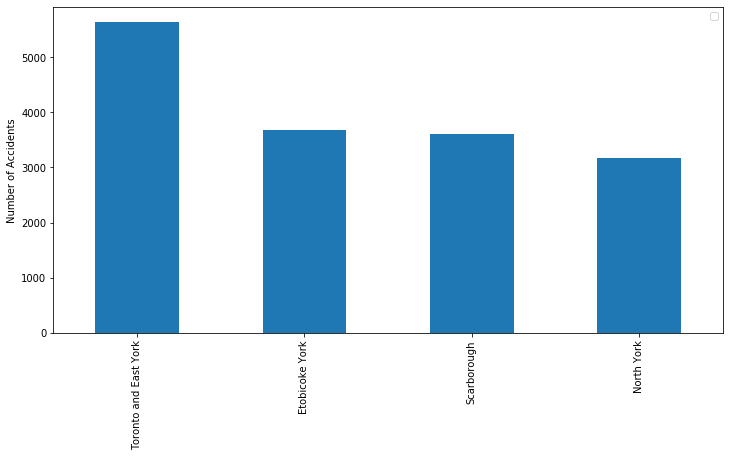

In [81]:
# lets see some visualisation,
#District wise Accidents which includes Fatal and NON-Fatal for popluation perspective.

District = df1['DISTRICT'].value_counts()
plt.figure(figsize=(12,6))
plt.ylabel('Number of Accidents')
plt.legend()
District.plot(kind='bar')
plt.show()

In [82]:
# Frequency of FATAL collisions in different districts per year
District_year = df1.groupby(by=['DISTRICT','YEAR'],as_index=False).sum()
District_year = District_year.pivot('DISTRICT','YEAR','FATAL')
District_year

YEAR,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
DISTRICT,,,,,,,,,,,,,,
Etobicoke York,55,38,43,30,32,36,30,33,28,33,48,27,38,33
North York,34,29,57,28,16,35,33,35,40,39,36,24,41,46
Scarborough,71,59,32,34,43,22,38,71,32,44,51,52,45,50
Toronto and East York,29,43,47,41,66,30,24,73,34,41,53,41,27,16


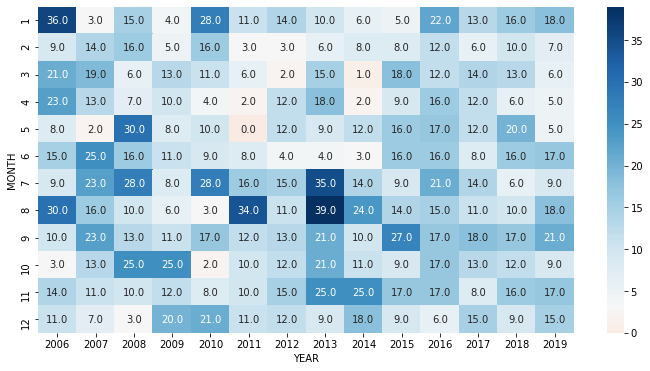

In [83]:
#lets see month and year wise as well.
year_month = df1.groupby(by=['YEAR', 'MONTH'],as_index=False).sum()
year_month = year_month.pivot('MONTH','YEAR','FATAL')
plt.figure(figsize=(12,6))
sns.heatmap(year_month, center=year_month.loc[1, 2007], annot=True, fmt=".1f", cmap="RdBu")
plt.show()

# This chart gives us the information about the frequencies of fatal collisions month and year wise,
# it turns out that August 2013 records highest fatal incidents, and records 0 collisions in May 2011.

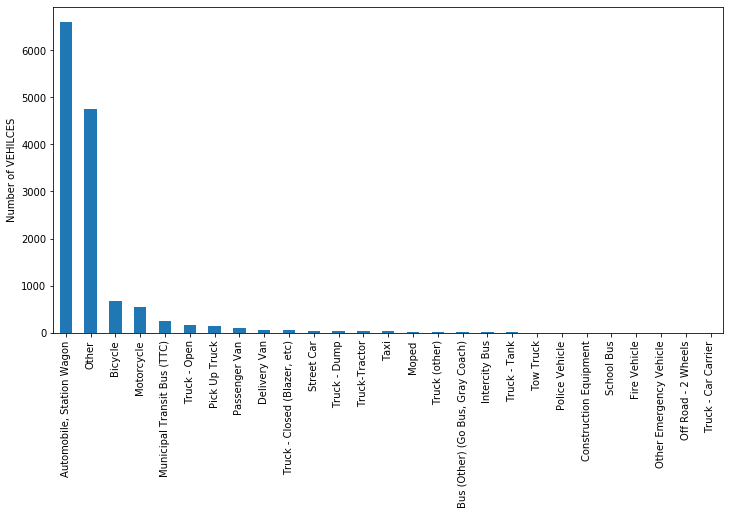

In [84]:
# looking at the different vehicles.
Vehicles = df['VEHTYPE'].value_counts()
plt.figure(figsize=(12,6))
plt.ylabel('Number of VEHILCES')
Vehicles.plot(kind='bar')
plt.show()

Text(0, 0.5, 'Victims')

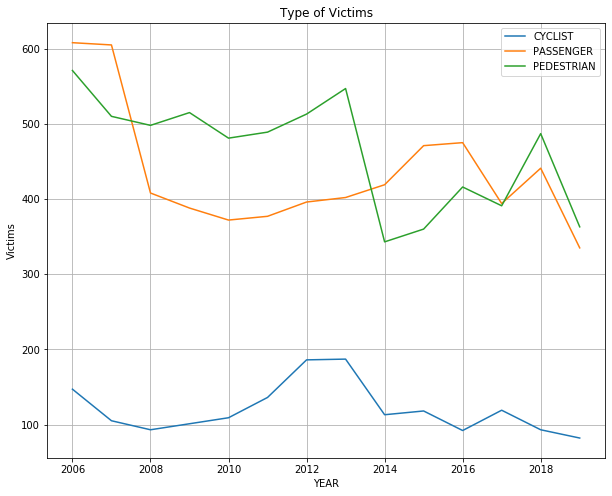

In [85]:
#Type of vehicles involved
victims = df1.pivot_table(index='YEAR',values=['CYCLIST','PEDESTRIAN','PASSENGER'],aggfunc=np.sum)
victims.plot(figsize=(10,8), title="Type of Victims", grid=True)
plt.ylabel('Victims')

In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16093 entries, 0 to 16092
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ACCNUM         16093 non-null  int64   
 1   YEAR           16093 non-null  int64   
 2   MONTH          16093 non-null  int64   
 3   DAY            16093 non-null  int64   
 4   HOUR           16093 non-null  int64   
 5   MINUTE         16093 non-null  int64   
 6   WEEKDAY        16093 non-null  int64   
 7   LATITUDE       16093 non-null  float64 
 8   LONGITUDE      16093 non-null  float64 
 9   Hood_ID        16093 non-null  int64   
 10  DISTRICT       16080 non-null  category
 11  ROAD_CLASS     15725 non-null  category
 12  TRAFFCTL       16064 non-null  category
 13  VISIBILITY     16071 non-null  category
 14  LIGHT          16093 non-null  category
 15  RDSFCOND       16066 non-null  category
 16  IMPACTYPE      16089 non-null  category
 17  INVTYPE        16083 non-null  

In [87]:
df1.MANOEUVER.head(10)


0            NaN
1            NaN
2    Going Ahead
3            NaN
4            NaN
5            NaN
6            NaN
7    Going Ahead
8            NaN
9            NaN
Name: MANOEUVER, dtype: category
Categories (16, object): [Changing Lanes, Disabled, Going Ahead, Making U Turn, ..., Stopped, Turning Left, Turning Right, Unknown]

In [88]:
# MANOEUVER has too many categories and half of the missing values.
df1=df1.drop(['MANOEUVER'],axis=1)
df1.columns

Index(['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Hood_ID', 'DISTRICT', 'ROAD_CLASS',
       'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE',
       'INJURY', 'DRIVACT', 'DRIVCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE',
       'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER',
       'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'FATAL'],
      dtype='object')

In [89]:
df1.DRIVACT.head(10)

0                 NaN
1                 NaN
2    Driving Properly
3                 NaN
4                 NaN
5                 NaN
6                 NaN
7        Lost control
8                 NaN
9                 NaN
Name: DRIVACT, dtype: category
Categories (13, object): [Disobeyed Traffic Control, Driving Properly, Exceeding Speed Limit, Failed to Yield Right of Way, ..., Other, Speed too Fast For Condition, Speed too Slow, Wrong Way on One Way Road]

In [90]:
# DRIVACT has too many categories and half of the missing values.
df1=df1.drop(['DRIVACT'],axis=1)
df1.columns

Index(['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Hood_ID', 'DISTRICT', 'ROAD_CLASS',
       'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE',
       'INJURY', 'DRIVCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE',
       'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER',
       'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'FATAL'],
      dtype='object')

In [91]:
df1.DRIVCOND.head(10)

0                                   NaN
1                                   NaN
2                                Normal
3                                   NaN
4                                   NaN
5                                   NaN
6                                   NaN
7    Ability Impaired, Alcohol Over .08
8                                   NaN
9                                   NaN
Name: DRIVCOND, dtype: category
Categories (10, object): [Ability Impaired, Alcohol, Ability Impaired, Alcohol Over .08, Ability Impaired, Drugs, Fatigue, ..., Medical or Physical Disability, Normal, Other, Unknown]

In [92]:
# DRIVCOND has too many categories and half of the missing values.
df1=df1.drop(['DRIVCOND'],axis=1)
df1.columns

Index(['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Hood_ID', 'DISTRICT', 'ROAD_CLASS',
       'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE',
       'INJURY', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'FATAL'],
      dtype='object')

In [93]:
# ROAD_CLASS has too many categories and does not make sense in evaluating fatal.
df1=df1.drop(['ROAD_CLASS'],axis=1)
df1.columns

Index(['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Hood_ID', 'DISTRICT', 'TRAFFCTL',
       'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE', 'INJURY',
       'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'FATAL'],
      dtype='object')

In [94]:
# injury and impact is also an after effect which should not impact our prediction of being fatal or non-fatal
df1=df1.drop(['IMPACTYPE','INJURY'],axis=1)
df1.columns

Index(['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Hood_ID', 'DISTRICT', 'TRAFFCTL',
       'VISIBILITY', 'LIGHT', 'RDSFCOND', 'INVTYPE', 'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'FATAL'],
      dtype='object')

In [95]:
# INVTYPE is redundant as we already has its categories as variables.
df1=df1.drop(['INVTYPE'],axis=1)
df1.columns

Index(['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Hood_ID', 'DISTRICT', 'TRAFFCTL',
       'VISIBILITY', 'LIGHT', 'RDSFCOND', 'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'FATAL'],
      dtype='object')

In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16093 entries, 0 to 16092
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ACCNUM         16093 non-null  int64   
 1   YEAR           16093 non-null  int64   
 2   MONTH          16093 non-null  int64   
 3   DAY            16093 non-null  int64   
 4   HOUR           16093 non-null  int64   
 5   MINUTE         16093 non-null  int64   
 6   WEEKDAY        16093 non-null  int64   
 7   LATITUDE       16093 non-null  float64 
 8   LONGITUDE      16093 non-null  float64 
 9   Hood_ID        16093 non-null  int64   
 10  DISTRICT       16080 non-null  category
 11  TRAFFCTL       16064 non-null  category
 12  VISIBILITY     16071 non-null  category
 13  LIGHT          16093 non-null  category
 14  RDSFCOND       16066 non-null  category
 15  PEDESTRIAN     16093 non-null  int64   
 16  CYCLIST        16093 non-null  int64   
 17  AUTOMOBILE     16093 non-null  

In [97]:
# Now, we have only 4 categorical variables which are not redundant and might impact the prediction of fatal and non-fatal
df1 = pd.get_dummies(df1, columns=['VISIBILITY','RDSFCOND','LIGHT','DISTRICT'])

In [98]:
#considering Account number is kind of an id, which is not good to use for modeling perspective.
df1=df1.drop(['ACCNUM','TRAFFCTL'],axis=1)

In [99]:
df1.columns

Index(['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'WEEKDAY', 'LATITUDE',
       'LONGITUDE', 'Hood_ID', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE',
       'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER',
       'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'FATAL',
       'VISIBILITY_Clear', 'VISIBILITY_Drifting Snow',
       'VISIBILITY_Fog, Mist, Smoke, Dust', 'VISIBILITY_Freezing Rain',
       'VISIBILITY_Other', 'VISIBILITY_Rain', 'VISIBILITY_Snow',
       'VISIBILITY_Strong wind', 'RDSFCOND_Dry', 'RDSFCOND_Ice',
       'RDSFCOND_Loose Sand or Gravel', 'RDSFCOND_Loose Snow',
       'RDSFCOND_Other', 'RDSFCOND_Packed Snow', 'RDSFCOND_Slush',
       'RDSFCOND_Spilled liquid', 'RDSFCOND_Wet', 'LIGHT_Dark',
       'LIGHT_Dark, artificial', 'LIGHT_Dawn', 'LIGHT_Dawn, artificial',
       'LIGHT_Daylight', 'LIGHT_Daylight, artificial', 'LIGHT_Dusk',
       'LIGHT_Dusk, artificial', 'LIGHT_Other', 'DISTRICT_Etobicoke York',
       'DISTRICT_North York', 'DISTRICT_S

In [100]:
X=df1.drop(['FATAL'],axis=1)
y=df1['FATAL']

In [101]:
# Splitting the data into 60% training and 40% testing
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [102]:
# fit a logistic regression (set penalty=l2 and Cv=3) on Selected variables on validation dataset
logit_reg = LogisticRegressionCV(penalty="l2", solver='liblinear', cv=3)
logit_reg.fit(train_X, train_y)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  -0.009726303031814591
          YEAR     MONTH       DAY      HOUR    MINUTE   WEEKDAY  LATITUDE  \
coeff  0.03017  0.000037  0.003218 -0.016689  0.003874 -0.016825 -0.403068   

       LONGITUDE  Hood_ID  PEDESTRIAN  ...  LIGHT_Dawn, artificial  \
coeff   0.563198 -0.00158    0.892079  ...                0.084328   

       LIGHT_Daylight  LIGHT_Daylight, artificial  LIGHT_Dusk  \
coeff       -0.253991                    -0.19819    0.297977   

       LIGHT_Dusk, artificial  LIGHT_Other  DISTRICT_Etobicoke York  \
coeff               -0.145439     0.094318                 0.041146   

       DISTRICT_North York  DISTRICT_Scarborough  \
coeff              0.05727              0.313404   

       DISTRICT_Toronto and East York  
coeff                        -0.48449  

[1 rows x 52 columns]

AIC 5410.805335331348


In [103]:
#Predict to get probablities on selected variables on validation dataset

logit_red_pred = logit_reg.predict(valid_X)
logit_red_proba = logit_reg.predict_proba(valid_X)

    

logit_result = pd.DataFrame({'actual': valid_y, 
                             'p(0)': [p[0] for p in logit_red_proba],
                             'p(1)': [p[1] for p in logit_red_proba],
                             'predicted': logit_red_pred })
logit_result.head(5)

,actual,p(0),p(1),predicted
5633,0,0.891551,0.108449,0
3745,1,0.787634,0.212366,0
3497,0,0.902270,0.097730,0
2305,0,0.825789,0.174211,0
14492,1,0.790908,0.209092,0


In [104]:
# Confusion matrix on selected variables.
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8641)

       Prediction
Actual    0    1
     0 8298   22
     1 1290   45
Confusion Matrix (Accuracy 0.8666)

       Prediction
Actual    0    1
     0 5553   12
     1  847   26


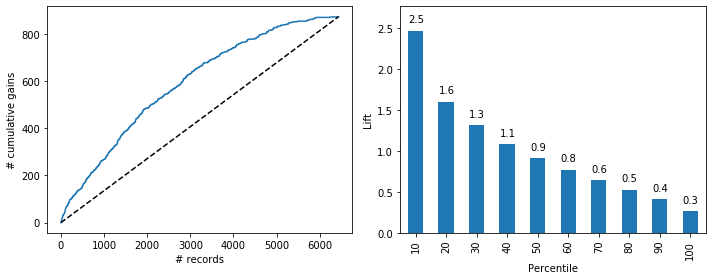

In [105]:
#Lift and gains chart on selected variables on Validation dataset
logit_red_pred = logit_reg.predict(valid_X)
logit_red_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y, 
                             'p(0)': [p[0] for p in logit_red_proba],
                             'p(1)': [p[1] for p in logit_red_proba],
                             'predicted': logit_red_pred })

df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
    
plt.tight_layout()
plt.show()

                              feature  importance       std
6                            LATITUDE    0.106747  0.015133
7                           LONGITUDE    0.102694  0.014016
4                              MINUTE    0.089008  0.011739
2                                 DAY    0.083875  0.011680
8                             Hood_ID    0.083282  0.012778
0                                YEAR    0.074619  0.010864
3                                HOUR    0.072685  0.010382
1                               MONTH    0.067237  0.010651
5                             WEEKDAY    0.053878  0.009404
16                          PASSENGER    0.018511  0.005636
9                          PEDESTRIAN    0.018004  0.006016
18                            AG_DRIV    0.016984  0.005193
13                              TRUCK    0.015952  0.005428
17                           SPEEDING    0.015120  0.005789
39                         LIGHT_Dark    0.013266  0.005300
43                     LIGHT_Daylight   

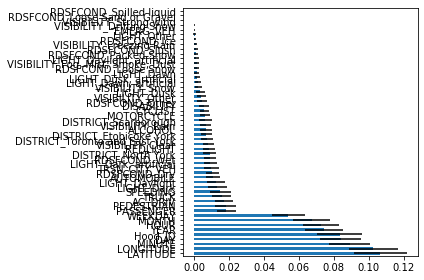

In [106]:
#Random Forest Classifier to know about best variables
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance',ascending=False)
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [107]:
#creating a copy to test with a lower threshold this time.
df2=df1


In [108]:
X1=df2.drop(['FATAL'],axis=1)
y1=df2['FATAL']

In [109]:
# Splitting the data into 60% training and 40% testing
train_X1, valid_X1, train_y1, valid_y1 = train_test_split(X1, y1, test_size=0.4, random_state=1)

In [110]:
train_X1.columns

Index(['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'WEEKDAY', 'LATITUDE',
       'LONGITUDE', 'Hood_ID', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE',
       'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER',
       'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'VISIBILITY_Clear', 'VISIBILITY_Drifting Snow',
       'VISIBILITY_Fog, Mist, Smoke, Dust', 'VISIBILITY_Freezing Rain',
       'VISIBILITY_Other', 'VISIBILITY_Rain', 'VISIBILITY_Snow',
       'VISIBILITY_Strong wind', 'RDSFCOND_Dry', 'RDSFCOND_Ice',
       'RDSFCOND_Loose Sand or Gravel', 'RDSFCOND_Loose Snow',
       'RDSFCOND_Other', 'RDSFCOND_Packed Snow', 'RDSFCOND_Slush',
       'RDSFCOND_Spilled liquid', 'RDSFCOND_Wet', 'LIGHT_Dark',
       'LIGHT_Dark, artificial', 'LIGHT_Dawn', 'LIGHT_Dawn, artificial',
       'LIGHT_Daylight', 'LIGHT_Daylight, artificial', 'LIGHT_Dusk',
       'LIGHT_Dusk, artificial', 'LIGHT_Other', 'DISTRICT_Etobicoke York',
       'DISTRICT_North York', 'DISTRICT_Scarboroug

In [111]:
# fit a logistic regression (set penalty=l2 and Cv=3) on Selected variables on validation dataset

logit_reg = LogisticRegressionCV(penalty="l2", solver='liblinear', cv=3)
logit_reg.fit(train_X1, train_y1)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X1.columns).transpose())
print()
print('AIC', AIC_score(valid_y1, logit_reg.predict(valid_X1), df = len(train_X1.columns) + 1))

intercept  -0.009726303031814591
          YEAR     MONTH       DAY      HOUR    MINUTE   WEEKDAY  LATITUDE  \
coeff  0.03017  0.000037  0.003218 -0.016689  0.003874 -0.016825 -0.403068   

       LONGITUDE  Hood_ID  PEDESTRIAN  ...  LIGHT_Dawn, artificial  \
coeff   0.563198 -0.00158    0.892079  ...                0.084328   

       LIGHT_Daylight  LIGHT_Daylight, artificial  LIGHT_Dusk  \
coeff       -0.253991                    -0.19819    0.297977   

       LIGHT_Dusk, artificial  LIGHT_Other  DISTRICT_Etobicoke York  \
coeff               -0.145439     0.094318                 0.041146   

       DISTRICT_North York  DISTRICT_Scarborough  \
coeff              0.05727              0.313404   

       DISTRICT_Toronto and East York  
coeff                        -0.48449  

[1 rows x 52 columns]

AIC 5410.805335331348


In [112]:
#Predict to get probablities on selected variables on validation dataset

logit_red_pred = logit_reg.predict(valid_X1)
logit_red_proba = logit_reg.predict_proba(valid_X1)

logit_result = pd.DataFrame({'actual': valid_y1, 
                             'p(0)': [p[0] for p in logit_red_proba],
                             'p(1)': [p[1] for p in logit_red_proba],
                             'predicted': logit_red_pred })
logit_result.head(5)



,actual,p(0),p(1),predicted
5633,0,0.891551,0.108449,0
3745,1,0.787634,0.212366,0
3497,0,0.902270,0.097730,0
2305,0,0.825789,0.174211,0
14492,1,0.790908,0.209092,0


In [113]:
#Classification summary
print(classificationSummary(valid_y1, (logit_red_proba[:, 1] > 0.25).astype(np.int64)))

Confusion Matrix (Accuracy 0.8215)

       Prediction
Actual    0    1
     0 5089  476
     1  673  200
None


In [114]:
#Predict to get probablities on selected variables on Training dataset

logit_red_pred = logit_reg.predict(train_X1)
logit_red_proba = logit_reg.predict_proba(train_X1)

logit_result = pd.DataFrame({'actual': train_y1, 
                             'p(0)': [p[0] for p in logit_red_proba],
                             'p(1)': [p[1] for p in logit_red_proba],
                             'predicted': logit_red_pred })
logit_result.head(5)



,actual,p(0),p(1),predicted
293,1,0.879639,0.120361,0
4691,0,0.946109,0.053891,0
15518,1,0.703281,0.296719,0
9973,0,0.847296,0.152704,0
60,1,0.643455,0.356545,0


In [115]:
# Classification summary for training datset.
print(classificationSummary(train_y1, (logit_red_proba[:, 1] > 0.25).astype(np.int64)))

Confusion Matrix (Accuracy 0.8281)

       Prediction
Actual    0    1
     0 7664  656
     1 1004  331
None


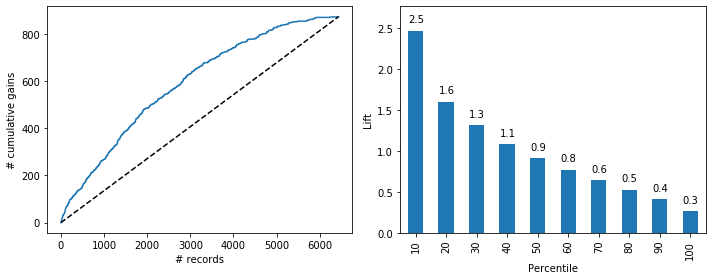

In [116]:
#Lift and gains chart on selected variables on Validation dataset
logit_red_pred = logit_reg.predict(valid_X1)
logit_red_proba = logit_reg.predict_proba(valid_X1)
logit_result = pd.DataFrame({'actual': valid_y1, 
                             'p(0)': [p[0] for p in logit_red_proba],
                             'p(1)': [p[1] for p in logit_red_proba],
                             'predicted': logit_red_pred })

df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
    
plt.tight_layout()
plt.show()

In [117]:
#Forward selection for variable selection
# The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)


Variables: YEAR, MONTH, DAY, HOUR, MINUTE, WEEKDAY, LATITUDE, LONGITUDE, Hood_ID, PEDESTRIAN, CYCLIST, AUTOMOBILE, MOTORCYCLE, TRUCK, TRSN_CITY_VEH, EMERG_VEH, PASSENGER, SPEEDING, AG_DRIV, REDLIGHT, ALCOHOL, DISABILITY, VISIBILITY_Clear, VISIBILITY_Drifting Snow, VISIBILITY_Fog, Mist, Smoke, Dust, VISIBILITY_Freezing Rain, VISIBILITY_Other, VISIBILITY_Rain, VISIBILITY_Snow, VISIBILITY_Strong wind, RDSFCOND_Dry, RDSFCOND_Ice, RDSFCOND_Loose Sand or Gravel, RDSFCOND_Loose Snow, RDSFCOND_Other, RDSFCOND_Packed Snow, RDSFCOND_Slush, RDSFCOND_Spilled liquid, RDSFCOND_Wet, LIGHT_Dark, LIGHT_Dark, artificial, LIGHT_Dawn, LIGHT_Dawn, artificial, LIGHT_Daylight, LIGHT_Daylight, artificial, LIGHT_Dusk, LIGHT_Dusk, artificial, LIGHT_Other, DISTRICT_Etobicoke York, DISTRICT_North York, DISTRICT_Scarborough, DISTRICT_Toronto and East York
Start: score=6864.06, constant
Step: score=6739.91, add TRUCK
Step: score=6620.41, add PEDESTRIAN
Step: score=6500.53, add SPEEDING
Step: score=6432.52, add DIST

In [118]:
#Stepwise regression
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: YEAR, MONTH, DAY, HOUR, MINUTE, WEEKDAY, LATITUDE, LONGITUDE, Hood_ID, PEDESTRIAN, CYCLIST, AUTOMOBILE, MOTORCYCLE, TRUCK, TRSN_CITY_VEH, EMERG_VEH, PASSENGER, SPEEDING, AG_DRIV, REDLIGHT, ALCOHOL, DISABILITY, VISIBILITY_Clear, VISIBILITY_Drifting Snow, VISIBILITY_Fog, Mist, Smoke, Dust, VISIBILITY_Freezing Rain, VISIBILITY_Other, VISIBILITY_Rain, VISIBILITY_Snow, VISIBILITY_Strong wind, RDSFCOND_Dry, RDSFCOND_Ice, RDSFCOND_Loose Sand or Gravel, RDSFCOND_Loose Snow, RDSFCOND_Other, RDSFCOND_Packed Snow, RDSFCOND_Slush, RDSFCOND_Spilled liquid, RDSFCOND_Wet, LIGHT_Dark, LIGHT_Dark, artificial, LIGHT_Dawn, LIGHT_Dawn, artificial, LIGHT_Daylight, LIGHT_Daylight, artificial, LIGHT_Dusk, LIGHT_Dusk, artificial, LIGHT_Other, DISTRICT_Etobicoke York, DISTRICT_North York, DISTRICT_Scarborough, DISTRICT_Toronto and East York
Start: score=6864.06, constant
Step: score=6739.91, add TRUCK
Step: score=6620.41, add PEDESTRIAN
Step: score=6500.53, add SPEEDING
Step: score=6432.52, add DIST

In [119]:
#Using the variables that we get from our stepwise regression.
new_df=df1[['TRUCK','YEAR','PEDESTRIAN','SPEEDING','DISTRICT_Toronto and East York','TRSN_CITY_VEH','VISIBILITY_Other','LIGHT_Dark','AG_DRIV','DISTRICT_Scarborough','HOUR','RDSFCOND_Ice','RDSFCOND_Other','REDLIGHT','LIGHT_Dusk','MOTORCYCLE','PASSENGER','VISIBILITY_Snow','MINUTE','DISABILITY','VISIBILITY_Fog, Mist, Smoke, Dust','LIGHT_Other','LONGITUDE','DISTRICT_Etobicoke York','VISIBILITY_Rain','VISIBILITY_Clear','VISIBILITY_Freezing Rain','VISIBILITY_Clear','VISIBILITY_Freezing Rain','VISIBILITY_Drifting Snow','VISIBILITY_Strong wind','FATAL']].copy()
new_df

,TRUCK,YEAR,PEDESTRIAN,SPEEDING,DISTRICT_Toronto and East York,TRSN_CITY_VEH,VISIBILITY_Other,LIGHT_Dark,AG_DRIV,DISTRICT_Scarborough,...,LONGITUDE,DISTRICT_Etobicoke York,VISIBILITY_Rain,VISIBILITY_Clear,VISIBILITY_Freezing Rain,VISIBILITY_Clear,VISIBILITY_Freezing Rain,VISIBILITY_Drifting Snow,VISIBILITY_Strong wind,FATAL
0,0,2006,0,1,1,0,0,1,1,0,...,-79.318797,0,0,1,0,1,0,0,0,0
1,0,2006,0,1,1,0,0,1,1,0,...,-79.318797,0,0,1,0,1,0,0,0,0
2,0,2006,0,1,1,0,0,1,1,0,...,-79.318797,0,0,1,0,1,0,0,0,0
3,0,2006,0,1,1,0,0,1,1,0,...,-79.318797,0,0,1,0,1,0,0,0,0
4,0,2006,0,1,1,0,0,1,1,0,...,-79.318797,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16088,0,2019,1,0,0,0,0,0,1,0,...,-79.516483,1,0,1,0,1,0,0,0,0
16089,0,2019,1,0,0,0,0,0,1,0,...,-79.516483,1,0,1,0,1,0,0,0,0
16090,0,2019,1,0,1,0,0,0,1,0,...,-79.384868,0,0,1,0,1,0,0,0,0
16091,0,2019,1,0,1,0,0,0,1,0,...,-79.384868,0,0,1,0,1,0,0,0,0


In [120]:
X2=new_df.drop(['FATAL'],axis=1)
y2=new_df['FATAL']

In [121]:
# Splitting the data into 60% training and 40% testing
train_X2, valid_X2, train_y2, valid_y2 = train_test_split(X2, y2, test_size=0.4, random_state=1)

In [122]:
# fit a logistic regression (set penalty=l2 and Cv=3) on Selected variables on validation dataset
logit_reg = LogisticRegressionCV(penalty="l2", solver='liblinear', cv=3)
logit_reg.fit(train_X2, train_y2)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X2.columns).transpose())
print()
print('AIC', AIC_score(valid_y2, logit_reg.predict(valid_X2), df = len(train_X2.columns) + 1))

intercept  -0.006398097637041183
          TRUCK      YEAR  PEDESTRIAN  SPEEDING  \
coeff  0.986963  0.014221    0.806294  0.859174   

       DISTRICT_Toronto and East York  TRSN_CITY_VEH  VISIBILITY_Other  \
coeff                       -0.485181       0.644204          0.392793   

       LIGHT_Dark   AG_DRIV  DISTRICT_Scarborough  ...  LIGHT_Other  \
coeff    0.428367 -0.364414              0.162741  ...     0.062352   

       LONGITUDE  DISTRICT_Etobicoke York  VISIBILITY_Rain  VISIBILITY_Clear  \
coeff   0.386355                 0.044013        -0.246548         -0.107742   

       VISIBILITY_Freezing Rain  VISIBILITY_Clear  VISIBILITY_Freezing Rain  \
coeff                  -0.06041         -0.107742                  -0.06041   

       VISIBILITY_Drifting Snow  VISIBILITY_Strong wind  
coeff                 -0.042508               -0.034464  

[1 rows x 31 columns]

AIC 5435.907274580046


In [123]:
#Predict to get probablities on selected variables on validation dataset
logit_red_pred = logit_reg.predict(valid_X2)
logit_red_proba = logit_reg.predict_proba(valid_X2)
logit_result = pd.DataFrame({'actual': valid_y2, 
                             'p(0)': [p[0] for p in logit_red_proba],
                             'p(1)': [p[1] for p in logit_red_proba],
                             'predicted': logit_red_pred })
logit_result.head(5)

,actual,p(0),p(1),predicted
5633,0,0.881071,0.118929,0
3745,1,0.792953,0.207047,0
3497,0,0.894444,0.105556,0
2305,0,0.810053,0.189947,0
14492,1,0.812024,0.187976,0


In [124]:
# Classification summary for training datset.
print(classificationSummary(valid_y2, (logit_red_proba[:, 1] > 0.25).astype(np.int64)))

Confusion Matrix (Accuracy 0.8329)

       Prediction
Actual    0    1
     0 5203  362
     1  714  159
None


In [125]:
#Predict to get probablities on selected variables on validation dataset
logit_red_pred = logit_reg.predict(train_X2)
logit_red_proba = logit_reg.predict_proba(train_X2)
logit_result = pd.DataFrame({'actual': train_y2, 
                             'p(0)': [p[0] for p in logit_red_proba],
                             'p(1)': [p[1] for p in logit_red_proba],
                             'predicted': logit_red_pred })
logit_result.head(5)

,actual,p(0),p(1),predicted
293,1,0.885483,0.114517,0
4691,0,0.935722,0.064278,0
15518,1,0.686985,0.313015,0
9973,0,0.841412,0.158588,0
60,1,0.698418,0.301582,0


In [126]:
# Classification summary for training datset.
print(classificationSummary(train_y2, (logit_red_proba[:, 1] > 0.25).astype(np.int64)))

Confusion Matrix (Accuracy 0.8387)

       Prediction
Actual    0    1
     0 7832  488
     1 1069  266
None


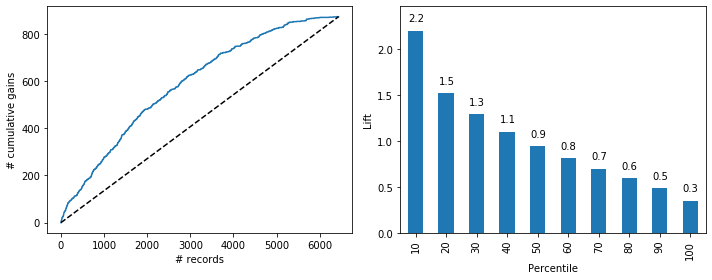

In [127]:
#Lift and gains chart on selected variables on Validation dataset
logit_red_pred = logit_reg.predict(valid_X2)
logit_red_proba = logit_reg.predict_proba(valid_X2)
logit_result = pd.DataFrame({'actual': valid_y2, 
                             'p(0)': [p[0] for p in logit_red_proba],
                             'p(1)': [p[1] for p in logit_red_proba],
                             'predicted': logit_red_pred })

df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
    
plt.tight_layout()
plt.show()

                              feature  importance       std
22                          LONGITUDE    0.230160  0.016072
18                             MINUTE    0.190534  0.016249
10                               HOUR    0.152830  0.015283
1                                YEAR    0.143700  0.015934
16                          PASSENGER    0.030536  0.008073
2                          PEDESTRIAN    0.024301  0.010381
8                             AG_DRIV    0.023908  0.008510
7                          LIGHT_Dark    0.022708  0.008701
0                               TRUCK    0.022174  0.007779
3                            SPEEDING    0.018174  0.007440
4      DISTRICT_Toronto and East York    0.016212  0.007046
5                       TRSN_CITY_VEH    0.016160  0.006306
23            DISTRICT_Etobicoke York    0.012841  0.004937
13                           REDLIGHT    0.012776  0.004262
9                DISTRICT_Scarborough    0.012690  0.006237
15                         MOTORCYCLE   

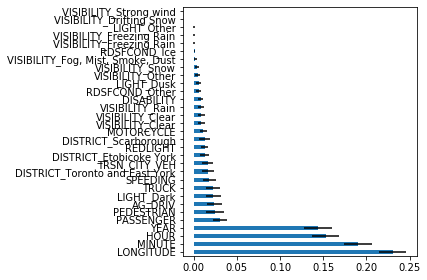

In [128]:
#Random Forest Classifier to know about best variables
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X2, train_y2)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X2.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance',ascending=False)
print(df)
df.to_excel (r'new_dataframe.xlsx', index = True, header=True)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [129]:
#correlation of each variable with FATAL
corr1 = new_df.corr()['FATAL']
corr1

TRUCK                                0.121895
YEAR                                 0.047603
PEDESTRIAN                           0.100295
SPEEDING                             0.099160
DISTRICT_Toronto and East York      -0.078656
TRSN_CITY_VEH                        0.062071
VISIBILITY_Other                     0.056397
LIGHT_Dark                           0.053868
AG_DRIV                             -0.027323
DISTRICT_Scarborough                 0.065105
HOUR                                -0.033988
RDSFCOND_Ice                        -0.021544
RDSFCOND_Other                       0.052834
REDLIGHT                            -0.000476
LIGHT_Dusk                           0.010364
MOTORCYCLE                          -0.011904
PASSENGER                            0.002346
VISIBILITY_Snow                     -0.012292
MINUTE                               0.023477
DISABILITY                          -0.005194
VISIBILITY_Fog, Mist, Smoke, Dust    0.003331
LIGHT_Other                       

In [130]:
# Finding partial R-squared for each varaible with respect to FATAL, as R2=correaltion's squares
r=corr1**2
r.sort_values(ascending=False)

FATAL                                1.000000e+00
TRUCK                                1.485830e-02
PEDESTRIAN                           1.005900e-02
SPEEDING                             9.832765e-03
DISTRICT_Toronto and East York       6.186839e-03
DISTRICT_Scarborough                 4.238701e-03
TRSN_CITY_VEH                        3.852806e-03
VISIBILITY_Other                     3.180678e-03
LIGHT_Dark                           2.901754e-03
RDSFCOND_Other                       2.791418e-03
YEAR                                 2.266051e-03
HOUR                                 1.155188e-03
LIGHT_Other                          8.832393e-04
AG_DRIV                              7.465469e-04
LONGITUDE                            6.274704e-04
MINUTE                               5.511500e-04
RDSFCOND_Ice                         4.641257e-04
VISIBILITY_Drifting Snow             1.879675e-04
VISIBILITY_Freezing Rain             1.861443e-04
VISIBILITY_Freezing Rain             1.861443e-04


In [131]:
#Checking the p-values.
logit_reg = sm.GLM(train_y2, train_X2)
logit_result = logit_reg.fit()
print(logit_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  FATAL   No. Observations:                 9655
Model:                            GLM   Df Residuals:                     9626
Model Family:                Gaussian   Df Model:                           28
Link Function:               identity   Scale:                         0.11024
Method:                          IRLS   Log-Likelihood:                -3040.4
Date:                Thu, 06 Aug 2020   Deviance:                       1061.2
Time:                        16:37:33   Pearson chi2:                 1.06e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
TRUCK 

In [132]:
# R2 from linear regression
reg = LinearRegression()
reg.fit(train_X2, train_y2)



# print performance measures
regressionSummary(train_y2, reg.predict(train_X2))

pred_y2 = reg.predict(train_X2)

print('adjusted r2 : ', adjusted_r2_score(train_y2, pred_y2, reg))
r2=adjusted_r2_score(train_y2, pred_y2, reg)


Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 0.3313
     Mean Absolute Error (MAE) : 0.2218
adjusted r2 :  0.07577691251059449


In [142]:
#Getting contribution of all the variables to the model.
contribution=r/r2
contribution=contribution*100
contribution.sort_values(ascending=False)
contribution_df=contribution.sort_values(ascending=False)

#exporting the file to export, have put below line in comments because already got the file in 1st run.
#contribution_df.to_excel (r'contribution.xlsx', index = True, header=True)
contribution_df=contribution_df.drop(['FATAL'])
contribution_df

TRUCK                                19.607950
PEDESTRIAN                           13.274493
SPEEDING                             12.975937
DISTRICT_Toronto and East York        8.164544
DISTRICT_Scarborough                  5.593658
TRSN_CITY_VEH                         5.084406
VISIBILITY_Other                      4.197423
LIGHT_Dark                            3.829338
RDSFCOND_Other                        3.683731
YEAR                                  2.990424
HOUR                                  1.524459
LIGHT_Other                           1.165578
AG_DRIV                               0.985190
LONGITUDE                             0.828050
MINUTE                                0.727332
RDSFCOND_Ice                          0.612490
VISIBILITY_Drifting Snow              0.248054
VISIBILITY_Freezing Rain              0.245648
VISIBILITY_Freezing Rain              0.245648
VISIBILITY_Snow                       0.199388
MOTORCYCLE                            0.187003
LIGHT_Dusk   